# Understanding Developer Trends in Stack Overflow Survey Data

# Introduction


The objective of this project is to analyze and interpret developer trends using the Stack Overflow survey dataset. This analysis aims to provide insights into the developer community, addressing the requirements of a rapidly growing client of our staffing agency that specializes in sourcing qualified candidates for development roles.

## Project Overview

Our client is keen to understand the types of developers available for hire and the general trends within the technology market. To facilitate this, we have access to a comprehensive Stack Overflow dataset, which comprises survey responses from developers worldwide over the past few years. By leveraging this dataset, we will perform a series of statistical analyses to illuminate various aspects of the developer community. These insights will empower our client to make informed decisions regarding their hiring strategies, thereby aligning their growth trajectory with market trends.




# Loading the Data


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file 

stack_overflow_file_path = 'developer_dataset.csv'

try:
    developer_dataset = pd.read_csv(stack_overflow_file_path)
except FileNotFoundError:
    print(f'Error: the file {stack_overflow_file_path} was not found')

stack_overflow_df = developer_dataset.copy()

/var/folders/ss/_s30b2md5nsgx4nr60qrj4nc0000gn/T/ipykernel_12838/942379579.py:6: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  developer_dataset = pd.read_csv(stack_overflow_file_path)


## Explore data

The dataset has 111,209 entries and 21 columns. Here are the first few rows and an overview of the columns:

	•	RespondentID: Unique identifier for each respondent.
	•	Year: The year the survey was conducted.
	•	Country: The respondent’s country.
	•	Employment: Employment status.
	•	UndergradMajor: Undergraduate major.
	•	DevType: Types of developers.
	•	LanguageWorkedWith: Languages the respondent has worked with.
	•	LanguageDesireNextYear: Languages the respondent wants to work with next year.
	•	DatabaseWorkedWith: Databases the respondent has worked with.
	•	DatabaseDesireNextYear: Databases the respondent wants to work with next year.
	•	PlatformWorkedWith: Platforms the respondent has worked with.
	•	PlatformDesireNextYear: Platforms the respondent wants to work with next year.
	•	Hobbyist: Whether the respondent codes as a hobby.
	•	OrgSize: Size of the organization the respondent works for.
	•	YearsCodePro: Years of professional coding experience.
	•	JobSeek: Whether the respondent is looking for a job.
	•	ConvertedComp: Annual salary in USD.
	•	WorkWeekHrs: Hours worked per week.
	•	NEWJobHunt: Reason for job hunting.
	•	NEWJobHuntResearch: How the respondent searches for new jobs.
	•	NEWLearn: How the respondent learns new technologies.


In [3]:
# Check the DataFrame info:
stack_overflow_df.info()
# Display the first few rows of the dataset
stack_overflow_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111209 entries, 0 to 111208
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   RespondentID            111209 non-null  int64  
 1   Year                    111209 non-null  int64  
 2   Country                 111209 non-null  object 
 3   Employment              109425 non-null  object 
 4   UndergradMajor          98453 non-null   object 
 5   DevType                 100433 non-null  object 
 6   LanguageWorkedWith      102018 non-null  object 
 7   LanguageDesireNextYear  96044 non-null   object 
 8   DatabaseWorkedWith      85859 non-null   object 
 9   DatabaseDesireNextYear  74234 non-null   object 
 10  PlatformWorkedWith      91609 non-null   object 
 11  PlatformDesireNextYear  85376 non-null   object 
 12  Hobbyist                68352 non-null   object 
 13  OrgSize                 54804 non-null   object 
 14  YearsCodePro        

,RespondentID,Year,Country,Employment,UndergradMajor,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,...,PlatformDesireNextYear,Hobbyist,OrgSize,YearsCodePro,JobSeek,ConvertedComp,WorkWeekHrs,NEWJobHunt,NEWJobHuntResearch,NEWLearn
0,1,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,141000.0,NaN,NaN,NaN,NaN
1,1,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...","Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,...,Linux;Windows,No,100 to 499 employees,1.0,I am not interested in new job opportunities,61000.0,80.0,NaN,NaN,NaN
2,1,2020,United States,Employed full-time,"Computer science, computer engineering, or sof...",NaN,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,...,Docker;Google Cloud Platform;Heroku;Linux;Windows,Yes,NaN,8.0,NaN,NaN,NaN,NaN,NaN,Once a year
3,2,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",...,Azure,NaN,NaN,4.0,NaN,48000.0,NaN,NaN,NaN,NaN
4,2,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...",Data or business analyst;Database administrato...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Yes,10 to 19 employees,8.0,I am not interested in new job opportunities,90000.0,40.0,NaN,NaN,NaN


# Data Cleaning

### Handling Highly Missing Data

Upon examining the dataset, it is evident that several columns contain a substantial amount of missing data. With such extensive missing data, any statistical analysis performed would likely lack accuracy and fail to represent the developers who participated in the survey adequately. Fortunately, it is a recognized practice to remove columns with approximately 60% or more missing data to ensure the integrity and reliability of the analysis.



In [4]:
# Check for missing values in each column 
missing_data = stack_overflow_df.isnull().sum()
missing_data_percentage = (missing_data / len(stack_overflow_df)) * 100 
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_data_percentage
})

missing_summary_sorted = missing_summary.sort_values(by='Percentage', ascending=False)
# Display the summary of missing data
missing_summary_sorted

,Missing Values,Percentage
NEWJobHuntResearch,92526,83.200101
NEWJobHunt,92082,82.800852
NEWLearn,86983,78.215792
WorkWeekHrs,60120,54.060373
OrgSize,56405,50.719816
JobSeek,50653,45.547573
Hobbyist,42857,38.537349
DatabaseDesireNextYear,36975,33.248208
PlatformDesireNextYear,25833,23.229235
DatabaseWorkedWith,25350,22.794918


Based on the above numbers, it is safe to remove the following columns:
* NEWJobHuntResearch
* NEWJobHunt
* NEWLearn

In [5]:
# Drop the aforementioned columns
stack_overflow_df.drop([
    'NEWJobHuntResearch',
    'NEWJobHunt',
    'NEWLearn',
], axis=1, inplace=True)

### Analysis of Developers by Country

In preparation for the analysis, key questions must be identified to guide the examination of the data. A primary focus will be investigating the distribution of employment status and developer types geographically, specifically by country.

The dataset reveals incomplete data in both the 'Employment' and 'DevType' fields. The extent is relatively minor, with less than 10% missing for each. However, given that these fields are foundational for subsequent analyses, addressing any data gaps is imperative to ensure the accuracy and reliability of the results.

To effectively handle this, a practical approach is to examine the missing data at the country level for each field. This will allow us to identify any patterns or trends that might inform our imputation strategy. Addressing incomplete data in key fields such as 'Employment' and 'DevType' is essential to ensure the integrity of our cross-country comparisons and support data-driven decision-making. By doing so, we can provide our clients with robust and reliable insights into the developer landscape, empowering them to make informed and strategic decisions.

                Total Users
Country                    
Canada                 8979
China                  2072
France                 6861
Germany               16215
Japan                  1049
Mexico                 1918
Spain                  4534
United Kingdom        15854
United States         53727 

Missing Data in `Employment` and `DevType` by Country:

          Country  Employment  DevType
0          Canada         148      944
1           China         139      491
2          France         104      848
3         Germany         386     1691
4           Japan          13      109
5          Mexico          25      207
6           Spain          74      434
7  United Kingdom         196     1472
8   United States         699     4580 



/Users/razu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/razu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


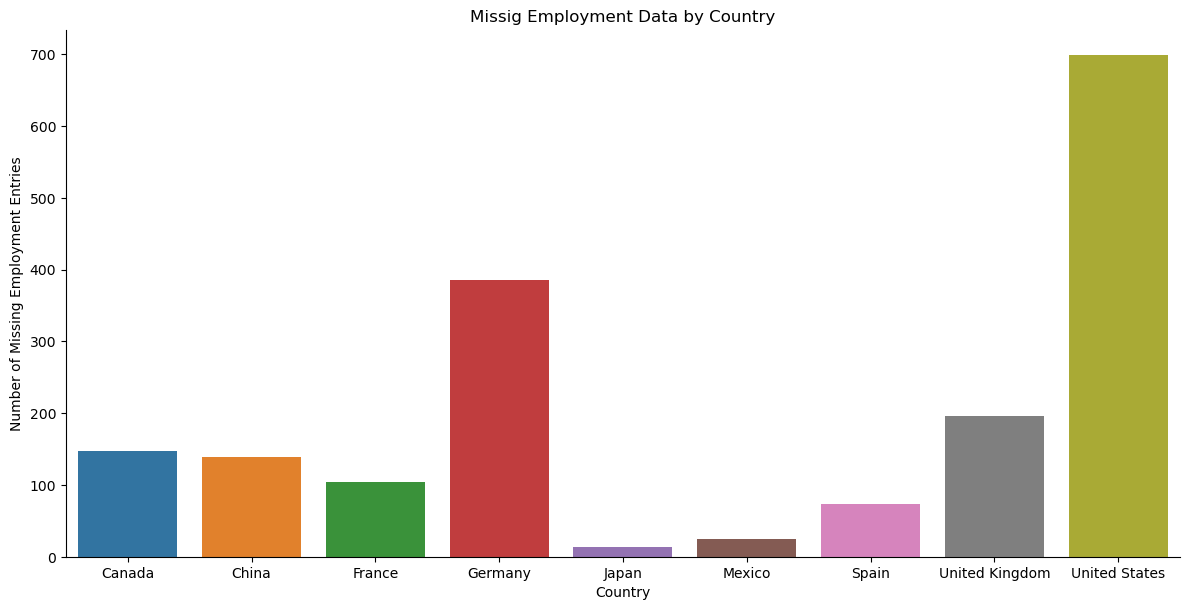

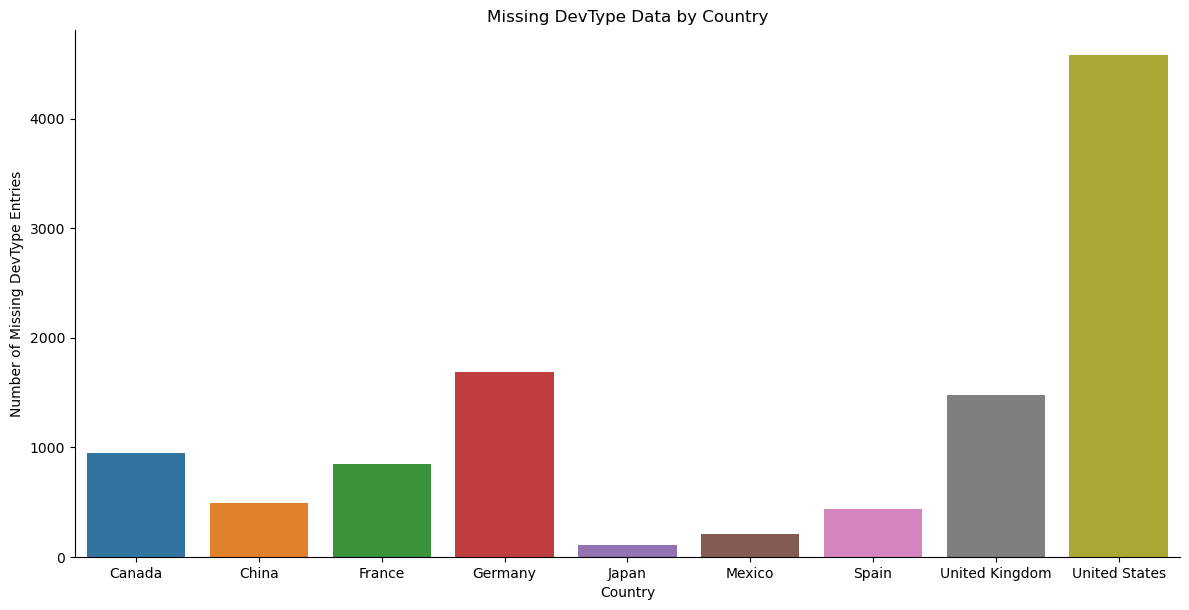

In [22]:
# Group the dataset by 'Country' and count the number of respondents for each country
country_counts = stack_overflow_df[[
    'RespondentID', 'Country'
]].groupby('Country').count().rename(columns={'RespondentID' : 'Total Users'})

print(country_counts,'\n')

#print(country_counts,'\n')

# Identify missing data in 'Employment' and 'DevType' columns, group by 'Country', and sum the missing values
missingData = stack_overflow_df[[
    'Employment', 'DevType'
]].isnull().groupby(stack_overflow_df['Country']).sum().reset_index()

print('Missing Data in `Employment` and `DevType` by Country:\n')
print(missingData,'\n')


# Plot the number of missing 'Employment' entries for each country 
A = sns.catplot(
    data=missingData, kind='bar', # Specify the dataset and plot type
    x='Country', y='Employment',  # Define the x and y axes
    height=6, aspect=2            # Set the size and aspect ratio of the plot
)
# Label the axes
A.set_xlabels('Country') # Label the x-axis
A.set_ylabels('Number of Missing Employment Entries') # Label the y-axis
plt.title('Missig Employment Data by Country')

# Plot the number of missing 'DevType' entries for each country
B = sns.catplot(
    data=missingData, kind='bar', # Specify the dataset and plot type
    x='Country', y='DevType',    # Define the x and y axes
    height=6, aspect=2            # Set the size and aspect ratio of the plot
)
B.set_axis_labels('Country', 'Number of Missing DevType Entries') # Label the axes
plt.title('Missing DevType Data by Country')

# Display the plots
plt.show()


As observed in the plots above, the missing data does not appear to be significantly higher for any particular country. Using domain knowledge, it is understood that the extent of missing data correlates with the relative size of the respondent population in each country. For instance, there is more missing data in the United States compared to Japan due to a higher number of respondents. Similarly, it is noted that the United States and Germany have a significantly larger average number of developers than other countries, which explains the higher count of missing data points in these countries.

Based on this analysis, it is determined that the missing data for the ‘Employment’ and ‘DevType’ columns can be classified as Missing Completely at Random (MCAR). This classification indicates that the missing data is not related to any specific variable in the dataset and can thus be safely removed without introducing bias. Therefore, rows with missing data in these columns can be deleted to maintain the integrity of the dataset.

In [27]:
# Remove rows with missing values in either 'Employment' or 'DevType' columns.\
stack_overflow_df.dropna(subset=[
    'Employment', 'DevType'
], inplace=True, how='any')



RespondentID                  0
Year                          0
Country                       0
Employment                    0
UndergradMajor             9390
DevType                       0
LanguageWorkedWith         6461
LanguageDesireNextYear    11874
DatabaseWorkedWith        19734
DatabaseDesireNextYear    30629
PlatformWorkedWith        15723
PlatformDesireNextYear    21422
Hobbyist                  40045
OrgSize                   46126
YearsCodePro              13423
JobSeek                   43024
ConvertedComp             16659
WorkWeekHrs               49683
dtype: int64